# Rod cutting problem

In [1]:
from collections import defaultdict

In [2]:
from functools import lru_cache

In [3]:
prices=defaultdict(lambda: -float('inf'))

In [4]:
prices[1]

-inf

In [5]:
len(prices)

1

In [6]:
for i, v in enumerate([1,5,8,9,10,17,17,20,24,30]):
    prices[i+1]=v

In [7]:
def reve(r):
    return max([prices[r]]+[(prices[i]+reve(r-i)) for i in range(1,r)])

In [8]:
reve(20)

60

In [9]:
import time
start=time.time()
reve(20)
print("time cost of this function is:{0}".format(time.time()-start))

time cost of this function is:0.47870492935180664


In [10]:
@lru_cache()
def reve(r):
    return max([prices[r]]+[(prices[i]+reve(r-i)) for i in range(1,r)])

In [13]:
start=time.time()
reve(20)
print("time cost of this function after cache added is:{}".format(time.time()-start))

time cost of this function after cache added is:0.0009975433349609375


In [14]:
help(lru_cache)

Help on function lru_cache in module functools:

lru_cache(maxsize=128, typed=False)
    Least-recently-used cache decorator.
    
    If *maxsize* is set to None, the LRU features are disabled and the cache
    can grow without bound.
    
    If *typed* is True, arguments of different types will be cached separately.
    For example, f(3.0) and f(3) will be treated as distinct calls with
    distinct results.
    
    Arguments to the cached function must be hashable.
    
    View the cache statistics named tuple (hits, misses, maxsize, currsize)
    with f.cache_info().  Clear the cache and statistics with f.cache_clear().
    Access the underlying function with f.__wrapped__.
    
    See:  http://en.wikipedia.org/wiki/Cache_algorithms#Least_Recently_Used



In [15]:
cached={}

def revenu(r):
    if r in cached:
        #print("I am in cached {}".format(r))
        return cached[r]
    opt=max([prices[r]]+[(prices[i]+revenu(r-i)) for i in range(1,r)])
    if opt not in cached:
        cached[r]=opt
    return opt

In [16]:
Cached={}

def Revenu(r):
    if r in Cached:
        #print("I am in cached {}".format(r))
        return Cached[r]
    opt=max([prices[r]]+[(prices[i]+Revenu(r-i)) for i in range(1,r)])
    Cached[r]=opt
    return opt

In [17]:
def print_hi(func):
    def _wrap(*args, **kwargs):
        print("I am in function {}".format(func.__name__))
        return func(*args, **kwargs)
    return _wrap

In [33]:
def add(a,b):return a+b

In [34]:
add(19,1)

20

In [35]:
@print_hi
def add(a,b):return a+b

In [36]:
add(19,1)

I am in function add


20

In [37]:
p_add=print_hi(add)

In [38]:
p_add(3,4)

I am in function _wrap
I am in function add


7

In [39]:
print_hi(revenu)(44)

I am in function revenu


130

<center> 
    <img src="test_home.JPG" width="100" height="50"></img> 
</center>

In [40]:
import time

def funcRunTime(func, times):
    start=time.time()
    for _ in range(times):
        func
    end=time.time()
    return end-start

In [43]:
funcRunTime(Revenu(105),200000)

0.007977008819580078

In [44]:
funcRunTime(revenu(105),200000)

0.005984306335449219

In [45]:
import random
random_numbers=[(i,random.randint(-10,20)) for i in range(10)]

In [46]:
random_numbers

[(0, 7),
 (1, 20),
 (2, -5),
 (3, 6),
 (4, 4),
 (5, 10),
 (6, 18),
 (7, 0),
 (8, -1),
 (9, 19)]

In [48]:
max(random_numbers,key=lambda x:x[1])

(1, 20)

In [57]:
revenu(100)

300

In [58]:
@lru_cache()
def addsome(somelist):
    return sum(somelist)

In [59]:
addsome([1,2,3,4])

TypeError: unhashable type: 'list'

In [89]:
from functools import wraps

In [90]:
def memo(func):
    cached={}
    @wraps(func)
    def _wrap(*args,**kwargs):
        str_key=str(args)+str(**kwargs)
        if str_key not in cached:
            result=func(*args,**kwargs)
            cached[str_key]=result
        return cached[str_key]
    return _wrap

In [91]:
@memo
def addsome(somelist):
    return sum(somelist)

In [92]:
addsome([1,2,3,4,5,6,6])

27

In [93]:
solution={}
@memo
def revenue(r):
    split, r_opt=max([(0,prices[r])]+[(i,prices[i]+revenue(r-i)) for i in range(1,r)], key=lambda x:x[1])
    solution[r]=(split,r-split)
    return r_opt

In [94]:
revenue(100)

300

In [95]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23),
 26: (6, 20),
 27: (1, 26),
 28: (2, 26),
 29: (3, 26),
 30: (10, 20),
 31: (1, 30),
 32: (2, 30),
 33: (3, 30),
 34: (2, 32),
 35: (2, 33),
 36: (6, 30),
 37: (1, 36),
 38: (2, 36),
 39: (3, 36),
 40: (10, 30),
 41: (1, 40),
 42: (2, 40),
 43: (3, 40),
 44: (2, 42),
 45: (2, 43),
 46: (6, 40),
 47: (1, 46),
 48: (2, 46),
 49: (3, 46),
 50: (10, 40),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (2, 52),
 55: (2, 53),
 56: (6, 50),
 57: (1, 56),
 58: (2, 56),
 59: (3, 56),
 60: (10, 50),
 61: (1, 60),
 62: (2, 60),
 63: (3, 60),
 64: (2, 62),
 65: (2, 63),
 66: (6, 60),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (1, 70),
 72: (2, 70),
 73:

In [96]:
def parse_solution(r,revenue_solution):
    left,right=revenue_solution[r]
    if left==0:return [right]
    return [left]+parse_solution(right,revenue_solution)

In [97]:
def pretty_solution(splits):
    return ' -->'.join(map(str,splits))

In [98]:
pretty_solution(parse_solution(18,solution))

'2 -->6 -->10'

In [99]:
pretty_solution(parse_solution(57,solution))

'1 -->6 -->10 -->10 -->10 -->10 -->10'

In [101]:
help(revenue)

Help on function revenue in module __main__:

revenue(r)



In [103]:
help(add)

Help on function _wrap in module __main__:

_wrap(*args, **kwargs)



In [106]:
start=time.time()
revenue(300)
print('used time:{}'.format(time.time()-start))

used time:0.09374880790710449


# Edit Distance

In [107]:
@memo
def get_ed_dist(string1,string2):
    if len(string1)==0:return len(string2)
    if len(string2)==0:return len(string1)
    
    return min(
        [get_ed_dist(string1[:-1],string2)+1,
         get_ed_dist(string1,string2[:-1])+1,
         get_ed_dist(string1[:-1],string2[:-1])+(0 if string1[-1] == string2[-1] else 2)
        ]
    )

In [108]:
get_ed_dist('biejing','beijing')

2

In [109]:
get_ed_dist('biejing','beijie')

5

In [111]:
get_ed_dist('biejing','beijin')

3

# More about Dynamic Programming
if you want to know more about Dynamic Programming, you may refer the `Introduction to Algorithms` by CLRS
# Optional, Try VRP Problem

In [113]:
import random
import matplotlib.pylab as plt

latitudes=[random.randint(-100,100) for _ in range(20)]
longitude=[random.randint(-100,100) for _ in range(20)]

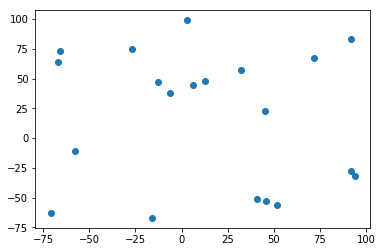

In [117]:
plt.scatter(latitudes,longitude)

# input: the latitudes and longitude of some points, and the number `k` of cars will travel for this. give it pls